# Problem 6

In [1]:
# Importing relevant packages and doing necessary setup
import cv2
import matplotlib.pyplot as plt
import matplotlib
import PIL
import numpy as np
from scipy import signal
import time
%matplotlib inline

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
# Helper function to display multiple images in a plot
def display_images(images, rows, cols, size, title, subtitles):
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c], cmap = 'gray')
            ax1.set_title(subtitles[c], fontsize = 20)
            c = c + 1
    plt.show()
    # Un comment the below line and comment the above line to save and display
    #plt.savefig('part2.png')

### Part 1

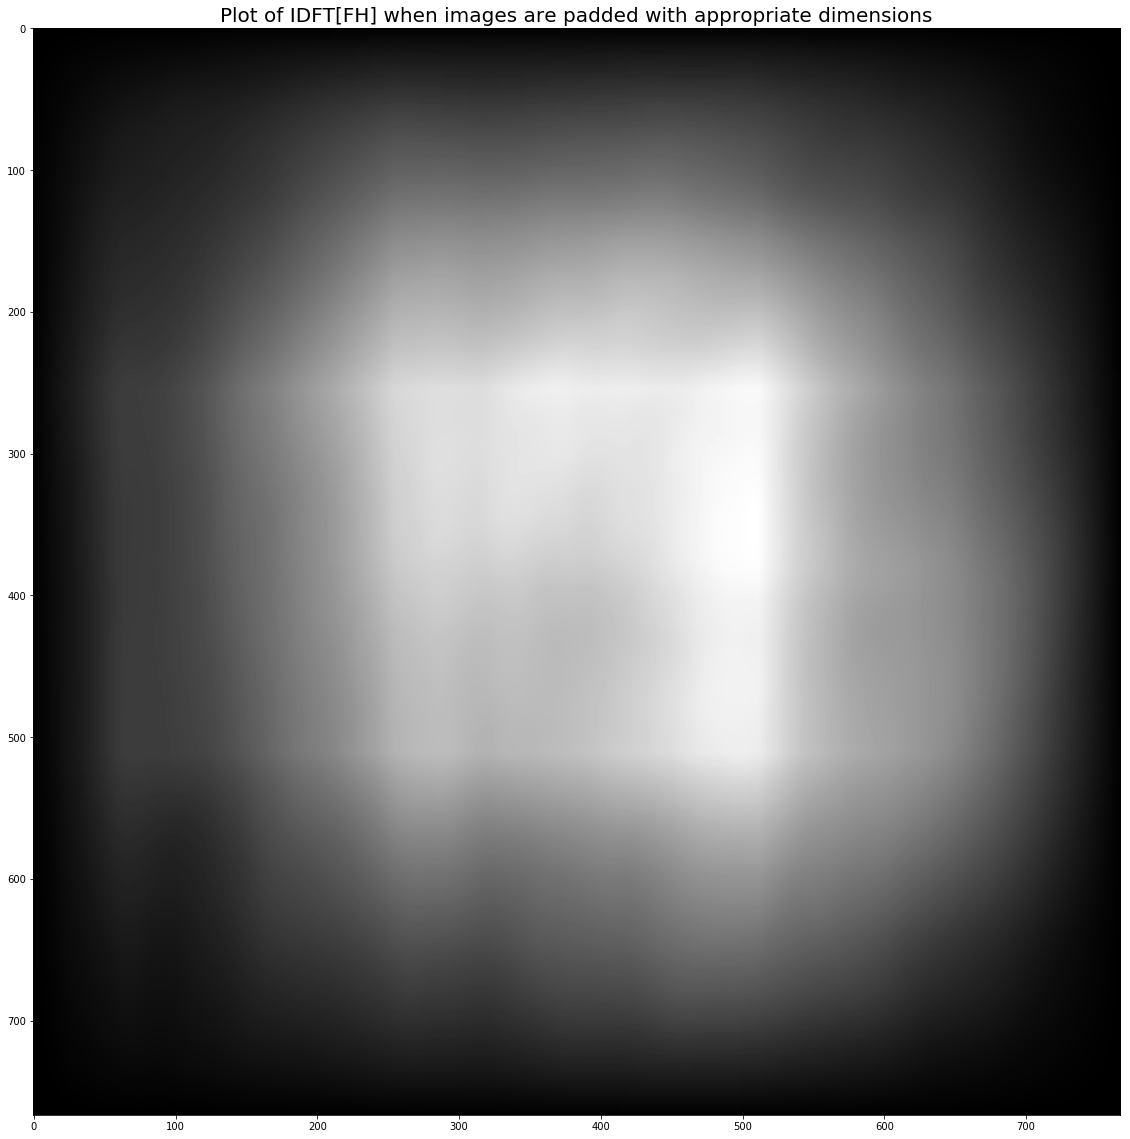

In [3]:
img1 = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../input_data/cameraman256.tif', cv2.IMREAD_GRAYSCALE)
dim1 = img1.shape[0] + img2.shape[0] - 1
dim2 = img1.shape[1] + img2.shape[1] - 1
img1 = np.pad(img1, [(0, dim1 - img1.shape[0]), (0, dim2 - img1.shape[1])], mode='constant', constant_values=0)
img2 = np.pad(img2, [(0, dim1 - img2.shape[0]), (0, dim2 - img2.shape[1])], mode='constant', constant_values=0)
F = np.fft.fft2(img1)
H = np.fft.fft2(img2)
res = np.abs(np.fft.ifft2(F * H))
images = []
subtitles = []
images.append(res)
subtitles.append('Plot of IDFT[FH] when images are padded with appropriate dimensions')
display_images(images, 1, 1, (20, 20), '', subtitles)

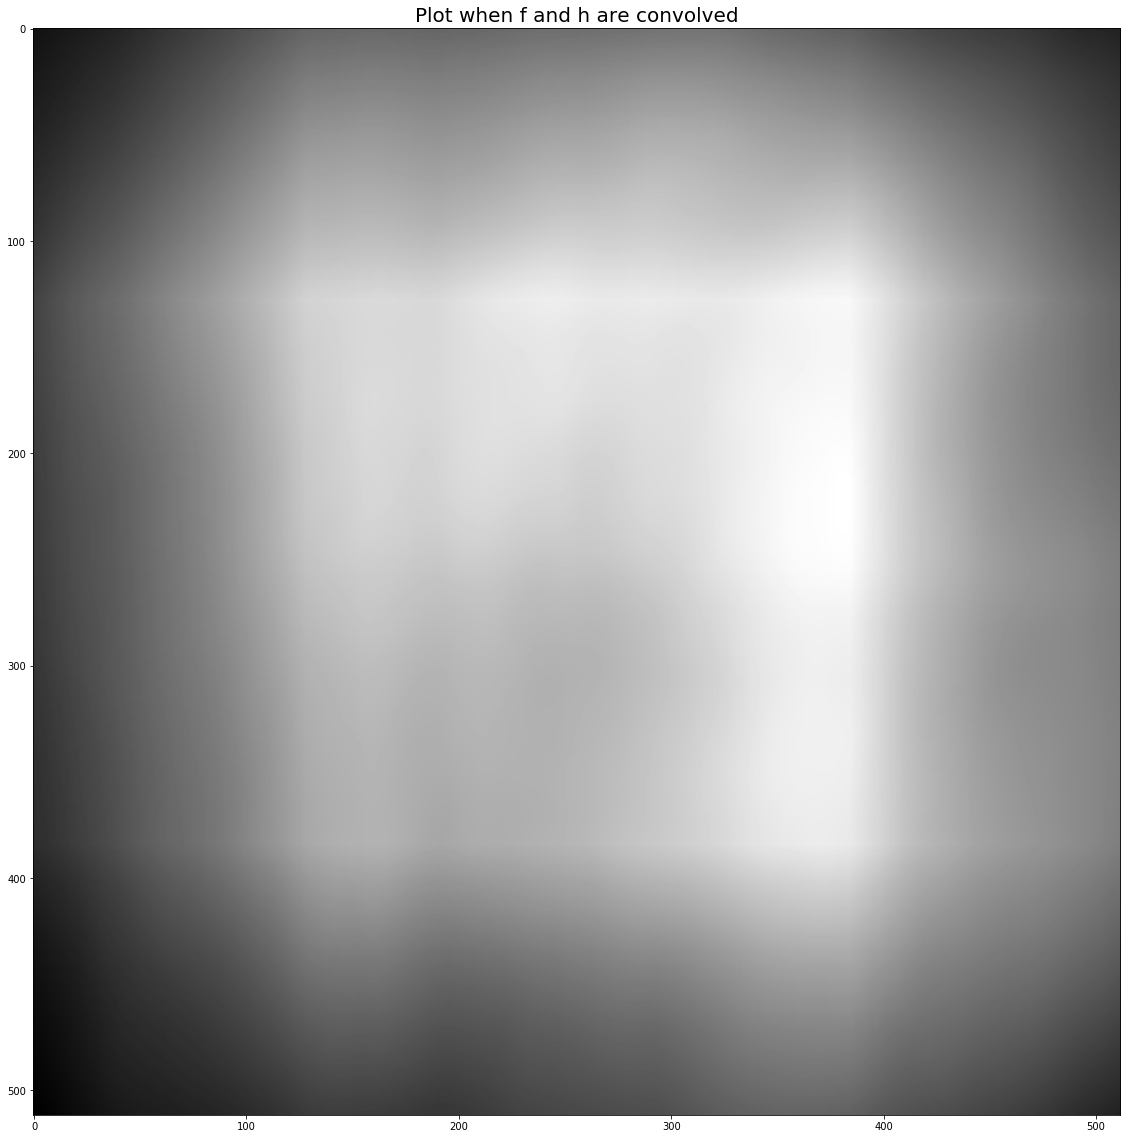

In [4]:
images = []
subtitles = []
img1 = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../input_data/cameraman256.tif', cv2.IMREAD_GRAYSCALE)
res = np.abs(signal.convolve2d(img1.astype(np.float64), img2.astype(np.float64), boundary='fill', mode='same'))
images.append(res)
subtitles.append('Plot when f and h are convolved')
display_images(images, 1, 1, (20, 20), '', subtitles)

### Part 2

In [5]:
img1 = cv2.imread('../input_data/lena256.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../input_data/cameraman256.tif', cv2.IMREAD_GRAYSCALE)
dim = [256, 512]
convolve_time = []
dft_time = []
start_time = time.time()
res = np.abs(signal.convolve2d(img1.astype(np.float64), img2.astype(np.float64), boundary='fill', mode='same'))
convolve_time.append(time.time() - start_time)

start_time = time.time()
dim1 = img1.shape[0] + img2.shape[0] - 1
dim2 = img1.shape[1] + img2.shape[1] - 1
img1 = np.pad(img1, [(0, dim1 - img1.shape[0]), (0, dim2 - img1.shape[1])], mode='constant', constant_values=0)
img2 = np.pad(img2, [(0, dim1 - img2.shape[0]), (0, dim2 - img2.shape[1])], mode='constant', constant_values=0)
F = np.fft.fft2(img1)
H = np.fft.fft2(img2)
res = np.abs(np.fft.ifft2(F * H))
dft_time.append(time.time() - start_time)

In [6]:
img1 = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)

start_time = time.time()
res = np.abs(signal.convolve2d(img1.astype(np.float64), img2.astype(np.float64), boundary='fill', mode='same'))
convolve_time.append(time.time() - start_time)

start_time = time.time()
dim1 = img1.shape[0] + img2.shape[0] - 1
dim2 = img1.shape[1] + img2.shape[1] - 1
img1 = np.pad(img1, [(0, dim1 - img1.shape[0]), (0, dim2 - img1.shape[1])], mode='constant', constant_values=0)
img2 = np.pad(img2, [(0, dim1 - img2.shape[0]), (0, dim2 - img2.shape[1])], mode='constant', constant_values=0)
F = np.fft.fft2(img1)
H = np.fft.fft2(img2)
res = np.abs(np.fft.ifft2(F * H))
dft_time.append(time.time() - start_time)

In [7]:
dim = [256, 512]
print(dft_time)
print(convolve_time)

[0.12490200996398926, 0.35356879234313965]
[9.110724687576294, 129.49312567710876]


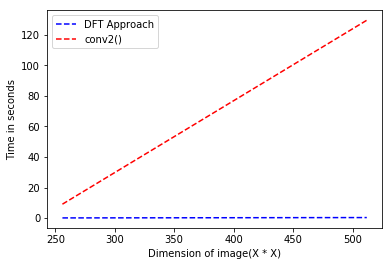

In [8]:
plt.plot(dim, dft_time, 'b--', label = 'DFT Approach')
plt.plot(dim, convolve_time, 'r--', label = 'conv2()')
plt.xlabel('Dimension of image(X * X)')
plt.ylabel('Time in seconds')
plt.gca().legend()
plt.show()

### Observations
- The time required increases exponentially with increasing dimensions of f and h when we use conv2() function.
- We can see from the above plot, the time required when we take DFT approach is almost constant and does not depend much on dimensions of f and h.